# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.preprocessing import  StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import warnings
warnings.filterwarnings("ignore")

# Task A: Data exploration

## A1. Data types

First we loaded the data from the csv file and explored each attribute's `data type`

In [4]:
data1 = pd.read_csv('Community-Participation-DataSet(8).csv')
data1

,Record#,Elapsed_Time,Time_in_Community,Gender,Working,Age,Family,Hobbies,Social_Club,Political,Professional,Religious,Support_Group
0,1,5.01,Long,F,No,49,Yes,Yes,No,No,No,Yes,No
1,2,3.50,Medium,M,No,46,Yes,No,No,No,No,No,No
2,3,2.82,Medium,F,Yes,50,No,No,No,No,Yes,No,No
3,4,7.98,Long,M,No,44,Yes,Yes,No,No,No,Yes,No
4,5,6.37,Long,F,Yes,27,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,2.78,Medium,F,Yes,47,No,No,No,No,Yes,No,No
1996,1997,2.99,Medium,F,Yes,27,No,No,No,No,No,No,No
1997,1998,6.71,Medium,M,Yes,43,Yes,No,No,Yes,Yes,No,No
1998,1999,6.13,Short,M,Yes,42,No,Yes,Yes,No,No,Yes,Yes


The data contains 2000 `record` and 13 `attribute`, let's explore thier types

In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Record#            2000 non-null   int64  
 1   Elapsed_Time       2000 non-null   float64
 2   Time_in_Community  2000 non-null   object 
 3   Gender             2000 non-null   object 
 4   Working            2000 non-null   object 
 5   Age                2000 non-null   int64  
 6   Family             2000 non-null   object 
 7   Hobbies            2000 non-null   object 
 8   Social_Club        2000 non-null   object 
 9   Political          2000 non-null   object 
 10  Professional       2000 non-null   object 
 11  Religious          2000 non-null   object 
 12  Support_Group      2000 non-null   object 
dtypes: float64(1), int64(2), object(10)
memory usage: 203.2+ KB


`Record#`: ordinal (ordered fashion and lack of inherent numerical meaning)

`Elapsed_Time`: ratio (there is a true zero point)

`Time_in_Community`: ordinal

`Gender`: Binary

`Working`: Binary

`Age`: ratio

`Family`: Binary

`Hobbies`: Binary

`Social_Club`: Binary

`Political`: Binary

`Professional`: Binary

`Religious`: Binary

## A2. Statistical summaries and visualizations


In this phase we are going to understand the data more and more through `statistical summaries` and `visualizations`.

Let's start simple:

In [7]:
data1[['Age', 'Elapsed_Time']].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2000.0,36.727500,10.699368,17.00,27.00,37.000,46.0000,57.00
Elapsed_Time,2000.0,5.912215,2.324282,2.01,3.84,5.905,7.8625,10.15



The mean and median being close suggests the data might follow a normal distribution.

In [8]:
data1.describe(include = "object").T

,count,unique,top,freq
Time_in_Community,2000,3,Long,841
Gender,2000,2,F,1028
Working,2000,2,Yes,1001
Family,2000,2,No,1208
Hobbies,2000,2,No,1413
Social_Club,2000,2,No,1627
Political,2000,2,No,1834
Professional,2000,2,No,1342
Religious,2000,2,No,1167
Support_Group,2000,2,No,1691


`Elapsed_Time distribution using Histogram plot`

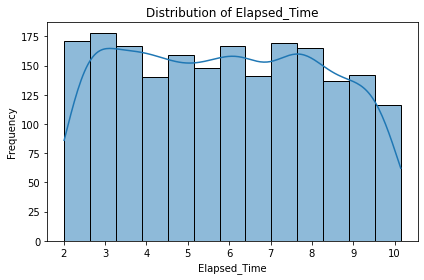

In [9]:
sns.histplot(data1['Elapsed_Time'], kde=True)
plt.title(f'Distribution of Elapsed_Time')
plt.xlabel('Elapsed_Time')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

`Age distribution using Histogram plot`

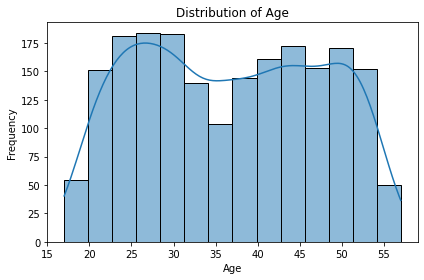

In [10]:
sns.histplot(data1['Age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

`Correlation between Age and Elapsed Time`

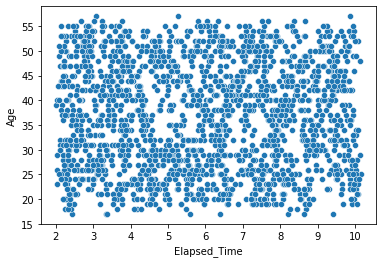

In [11]:
sns.scatterplot(data=data1, x='Elapsed_Time', y='Age')
plt.show()

There is no clear correlation




**Lets see the value counts of some attributes using word cloud and bar plot**

`Time_in_Community`

In [16]:
text = data1['Time_in_Community']
text = ' '.join(list(text))
wordcloud = WordCloud().generate(text)

x = list(dict(data1['Time_in_Community'].value_counts()).keys())
counts = list(data1['Time_in_Community'].value_counts())

fig, axs = plt.subplots(1, 2, figsize=(15,7))

axs[0].imshow(wordcloud, interpolation='bilinear')
axs[0].axis("off")

axs[1].bar(x=x,height=counts, data=data1, color=['#5F0F40', '#FB8B24', '#E36414'])
plt.show()

ValueError: Only supported for TrueType fonts

`Gender`

In [13]:
text = data1['Gender']
text = ' '.join(list(text))
wordcloud = WordCloud().generate(text)

x = list(dict(data1['Gender'].value_counts()).keys())
counts = list(data1['Gender'].value_counts())

fig, axs = plt.subplots(1, 2, figsize=(15,7))

axs[0].imshow(wordcloud, interpolation='bilinear')
axs[0].axis("off")

axs[1].bar(x=x,height=counts, data=data1, color=['#5F0F40', '#FB8B24', '#E36414'])
plt.show()

ValueError: Only supported for TrueType fonts

## A3_1. Clustering

In [ ]:
numerical = data1.select_dtypes(include=['number']).drop('Record#', axis=1).columns
categorical = data1.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical),
        ('cat', OneHotEncoder(), categorical)
    ])

prep_data = preprocessor.fit_transform(data1)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(prep_data)

plt.figure(figsize=(10,6))
plt.scatter(data1['Elapsed_Time'], data1['Age'], c=clusters, cmap='plasma', marker='o')
plt.title('Cluster Visualization (Simplified Data)')
plt.xlabel('Elapsed_Time')
plt.ylabel('Age')
plt.colorbar(label='Cluster')
plt.show()

## A3_2. Outliers

we will detect outliers using `Boxplot`

`Age`

In [ ]:
sns.boxplot(data=data1['Age'], color='skyblue', orient='h')
plt.title('Boxplot of Age')
plt.show()

`Elapsed_Time`

In [ ]:
sns.boxplot(data=data1['Elapsed_Time'], color='mediumseagreen', orient='h')
plt.title('Boxplot of Elapsed_Time')
plt.show()

**There is no outliers in our data depending on the box plots**

# Task B: Data preprocessing

## B. Loading scoring dataset

In [ ]:
# We Chose the 8th dataset
data2 = pd.read_csv('/content/Scoring-Dataset-8.csv')
data2

## B1. Binning

### 1. Equal width binning

**Performing `equal width binning`**

In [ ]:
#Equal width binning
min_age = data2['Age'].min()
max_age = data2['Age'].max()
w = (max_age - min_age) / 3

bin_boundaries = [min_age + i * w for i in range(3)]  #bin boundaries = min + i * w
bin_boundaries.append(max_age)

data2['equi_width'] = pd.cut(data2['Age'], bins=bin_boundaries, labels=['Bin 1', 'Bin 2', 'Bin 3'], include_lowest=True)

data2[['Age', 'equi_width']]

**Bin values**

In [ ]:
for bin_number in ['Bin 1', 'Bin 2', 'Bin 3']:
  bin_values = data2[data2['equi_width'] == bin_number]['Age'].tolist()

  print(f'{bin_number}: {bin_values}\n')

**Smoothing by `bin means`**

In [ ]:
for bin_number in ['Bin 1', 'Bin 2', 'Bin 3']:
  bin_mean = np.mean(data2[data2['equi_width'] == bin_number]['Age'].tolist())
  bin_mean = round(bin_mean)
  data2.loc[data2['equi_width'] == bin_number, 'Age_Smoothed'] = bin_mean

data2[['Age', 'equi_width', 'Age_Smoothed']]

In [ ]:
# We'll keep smoothed values only
data2.drop('equi_width', axis=1, inplace=True)

### 2. Equal depth binning

In [ ]:
#first we will sort the data by age to perform equal depth binning
data2 = data2.sort_values(by='Age')
data2.reset_index(drop=True, inplace=True)

data2.loc[:99, 'equi_depth'] = 'Bin 1'

data2.loc[100:199, 'equi_depth'] = 'Bin 2'

data2.loc[200:, 'equi_depth'] = 'Bin 3'

data2[['Age', 'equi_depth']]

**Making sure that they are `equal`**

In [ ]:
data2['equi_depth'].value_counts()

**Smoothing `by bin means`**

In [ ]:
for bin_number in ['Bin 1', 'Bin 2', 'Bin 3']:
  bin_mean = np.mean(data2[data2['equi_depth'] == bin_number]['Age'].tolist())
  bin_mean = round(bin_mean)
  data2.loc[data2['equi_depth'] == bin_number, 'Age_Smoothed_2'] = bin_mean

data2[['Age', 'equi_depth', 'Age_Smoothed_2']]

In [ ]:
# We'll keep smoothed values only
data2.drop('equi_depth', axis=1, inplace=True)

## B2. Normalization

In [ ]:
#Min Max
min = data2['Age'].min()
max = data2['Age'].max()
data2['Age_minmax'] = (data2['Age'] - min) / (max - min)

In [ ]:
#Z-score
mu = data2['Age'].mean()
std = data2['Age'].std()

data2['Age_Zscore'] = (data2['Age'] - mu) / std

## B3. Discretization

In [ ]:
labels = ['Teenager', 'Young', 'Mid_Age', 'Mature', 'Old']
edges = [0, 16, 35, 55, 70, np.inf]

data2['Age_categorical'] = pd.cut(data2['Age'], bins=edges, labels=labels)

In [ ]:
data2[['Age_categorical', 'Age']]

## B4. Converting Gender to binary

In [ ]:
data2['Gender_Binary'] = data2['Gender'].map({'M': 1, 'F': 0})
data2[['Gender', 'Gender_Binary']]

## Final view of the `preprocessed` attributes

In [ ]:
data_preprocessed = data2[['Age', 'Age_categorical','Age_Smoothed', 'Age_Smoothed_2', 'Gender', 'Gender_Binary']]
data_preprocessed.sample(8)

# Task C: Association rules mining

## Load the data again

In [ ]:
#load the data
data = pd.read_csv('/content/Community-Participation-DataSet(8).csv')
data = data.drop(columns=['Age', 'Record#', 'Elapsed_Time'], axis=1)


## Apriori

**First we will convert the data into a list of transactions**

In [ ]:
transactions = []

for i in range(len(data)):
    one_transaction = []
    row = data.iloc[i] #series

    one_transaction.append(row['Time_in_Community'])

    if row['Working'] == 'Yes': one_transaction.append('Working')
    if row['Family'] == 'Yes': one_transaction.append('Family')
    if row['Support_Group'] == 'Yes': one_transaction.append('Support_Group')
    if row['Religious'] == 'Yes': one_transaction.append('Religious')
    if row['Professional'] == 'Yes': one_transaction.append('Professional')
    if row['Political'] == 'Yes': one_transaction.append('Political')
    if row['Social_Club'] == 'Yes': one_transaction.append('Social_Club')
    if row['Hobbies'] == 'Yes': one_transaction.append('Hobbies')

    transactions.append(one_transaction)

**Declaring a transaction encoder to convert the data to a format that `apriori` algorithm accepts**

In [ ]:
t_encoder = TransactionEncoder()
te_arr = t_encoder.fit_transform(transactions)
df = pd.DataFrame(te_arr, columns=t_encoder.columns_)

**Applying `apriori` algorithm on our transformed data**

In [ ]:
frequent_itemsets = apriori(df, min_support=0.15, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

**Printing the `results`**

In [ ]:
rules[['antecedents', 'consequents','support', 'confidence']]

**Increasing the threshold of `confidence` to be `> 0.70`**

In [ ]:
frequent_itemsets = apriori(df, min_support=0.15, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.70)

In [ ]:
rules[['antecedents', 'consequents','support', 'confidence']]

These rules suggest strong associations between being involved in hobby-oriented community organizations (and in combination with family-oriented organizations) and being a member of a religious organization.